# The Sparks Foundation (GRIP'23)
  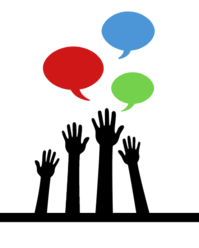
## Task 1 - Linear Regression Analysis

#### Aim: To predict the percentage of a student based on the number of study hours
#### Author: Raghavesh Mishra


In [3]:
# Importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
%matplotlib inline

In [5]:
# Reading the data
df = pd.read_csv("test_score_data.csv");
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
df.shape

(25, 2)

In [11]:
df['Hours'].describe()
df['Scores'].describe()

count    25.000000
mean     51.480000
std      25.286887
min      17.000000
25%      30.000000
50%      47.000000
75%      75.000000
max      95.000000
Name: Scores, dtype: float64

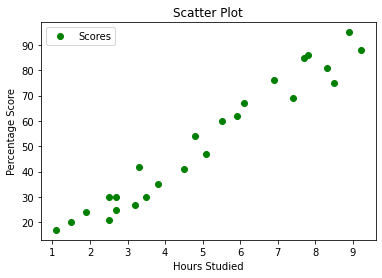

In [14]:
# Visualization usign scatter plot:
df.plot(x='Hours', y='Scores', style='o',color = "Green")  

plt.title('Scatter Plot')  

plt.xlabel('Hours Studied')  

plt.ylabel('Percentage Score')  

plt.show()

In [15]:
df.corr()
# Here we can see that there is positive correlation between hours and scores:

# Hence we can apply our regression model easily

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [20]:
# Defining our independent variable (X) and dependent variable (Y)

X = df['Hours'].values  # Independent variable (study hours)

Y = df['Scores'].values   # Dependent variable (percentage scores)

In [60]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                            test_size=0.2, random_state=0) 

In [61]:
# Training the data
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Fit the model to your data
model.fit(X_train.reshape(-1,1), y_train)

# Get the intercept (b0) and slope coefficient (b1)
intercept = model.intercept_
slope = model.coef_[0]

# Print the estimated equation
print(f"Estimated equation: Y = {intercept:.2f} + {slope:.2f} * X")

Estimated equation: Y = 2.02 + 9.91 * X


R-squared (R²): 0.9527
Mean Squared Error (MSE): 29.04
Root Mean Squared Error (RMSE): 5.39


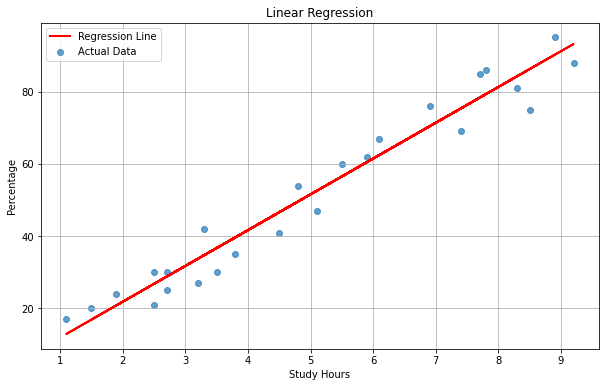

In [62]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Assuming you already have your linear regression model 'model' fitted

# Predict using the fitted model
Y_pred = model.predict(X.reshape(-1, 1))

# Calculate R-squared (R²)
r_squared = r2_score(Y, Y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Y, Y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print evaluation metrics
print(f"R-squared (R²): {r_squared:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Create a scatter plot with the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, label="Actual Data", alpha=0.7)
plt.plot(X, Y_pred, color='red', linewidth=2, label="Regression Line")
plt.xlabel("Study Hours")
plt.ylabel("Percentage")
plt.title("Linear Regression")
plt.legend()
plt.grid(True)
plt.show()

In [30]:
# Interpreting the result:
# Positive correlation with less Mean squared error and high R2 value

In [63]:
study_hours_to_predict = 2.5 
# Predicting  the percentage using the trained model
predicted_percentage = model.predict(np.array([[study_hours_to_predict]]))
# Print the predicted percentage
print(f"Predicted Percentage for {study_hours_to_predict} hours of study: {predicted_percentage[0]:.2f}%")

Predicted Percentage for 2.5 hours of study: 26.79%


#### Predicting score of a person who studied 9.25 hours

In [64]:
study_hours_to_predict = 9.25
# Predicting  the percentage using the trained model
predicted_percentage = model.predict(np.array([[study_hours_to_predict]]))
# Print the predicted percentage
print(f"Predicted Percentage for {study_hours_to_predict} hours of study: {predicted_percentage[0]:.2f}%")

Predicted Percentage for 9.25 hours of study: 93.69%


In [65]:
#Comparing the actual vs predicted value
comparison_df = pd.DataFrame({'Actual': Y, 'Predicted': Y_pred})
print(comparison_df.head())

   Actual  Predicted
0      21  26.794801
1      47  52.562508
2      27  33.732261
3      75  86.258740
4      30  36.705458


In [66]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y, Y_pred)) 

Mean Absolute Error: 4.986053347144891
